In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
import pickle

In [2]:
data_train = pd.read_csv('data/dataframe.csv', sep=';', index_col='ID')

In [3]:
data_test = pd.read_csv('data/dataframe.csv', sep=';', index_col='ID')

In [35]:
data_train

,CMP_TYPE_CUSTOMER,CMP_TYPE_PARTNER,OPPORTUNITY_DEAL_Q01,PROBABILITY_DEAL_Q01,TIME_DIFF_BEGIN_CLOSE_DEAL_Q01,OPPORTUNITY_DEAL_Q09,PROBABILITY_DEAL_Q09,TIME_DIFF_BEGIN_CLOSE_DEAL_Q09,OPPORTUNITY_DEAL_MEAN,PROBABILITY,...,OPPORTUNITY_QUO_MEAN,TIME_DIFF_CREATE_CLOSE_QUO_MEAN,STATUS_ID_DEC,STATUS_ID_APP,STATUS_ID_DRA,STATUS_ID_UNA,STATUS_ID_REC,OPPORTUNITY_QUO_MEDIAN,TIME_DIFF_CREATE_CLOSE_QUO_MEDIAN,target
ID,,,,,,,,,,,,,,,,,,,,,
13,1,0,3213.0,0.0,11.000000,231072.5,100.0,722.1000,61099.5270,31.111110,...,32772.06,5.169445,0.176471,0.647059,0.117647,0.0,0.058824,16275.0,5.625,1
15,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000,0
17,1,0,0.0,0.0,16.900000,0.0,0.0,104.1000,0.0000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000,0
21,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000,0
23,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000,0
25,1,0,0.0,0.0,7.000000,195000.0,80.0,124.0000,101481.8200,23.636364,...,135500.00,5.750000,0.000000,1.000000,0.000000,0.0,0.000000,135500.0,5.750,0
27,1,0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000,0
29,1,0,10755.4,0.0,7.000000,39482.5,91.0,7.0000,24198.2500,42.500000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000,0
11,1,0,0.0,0.0,7.000000,9970.0,40.0,96.6000,4975.0000,16.666666,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000,0


In [5]:
data_test.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CMP_TYPE_CUSTOMER,289.0,0.830450,0.375888,0.000000,1.000000,1.000000,1.000000,1.000000
CMP_TYPE_PARTNER,289.0,0.027682,0.164344,0.000000,0.000000,0.000000,0.000000,1.000000
OPPORTUNITY_DEAL_Q01,289.0,16861.439446,45213.875172,0.000000,580.000000,3885.000000,15845.000000,502710.000000
PROBABILITY_DEAL_Q01,289.0,8.245329,23.983306,0.000000,0.000000,0.000000,0.000000,100.000000
TIME_DIFF_BEGIN_CLOSE_DEAL_Q01,289.0,102.687543,208.356457,-210.800000,7.000000,14.100000,90.700000,1598.041600
OPPORTUNITY_DEAL_Q09,289.0,49961.535734,83108.862592,0.000000,5220.000000,21010.000000,59770.000000,837190.000000
PROBABILITY_DEAL_Q09,289.0,24.887543,38.563404,0.000000,0.000000,0.000000,50.000000,100.000000
TIME_DIFF_BEGIN_CLOSE_DEAL_Q09,289.0,299.743973,322.125404,0.000000,7.000000,180.000000,560.000000,1598.041600
OPPORTUNITY_DEAL_MEAN,289.0,31722.448667,58171.976850,0.000000,3498.000000,14500.000000,37700.000000,669950.000000
PROBABILITY,289.0,15.418047,27.421426,0.000000,0.000000,0.000000,21.428572,100.000000


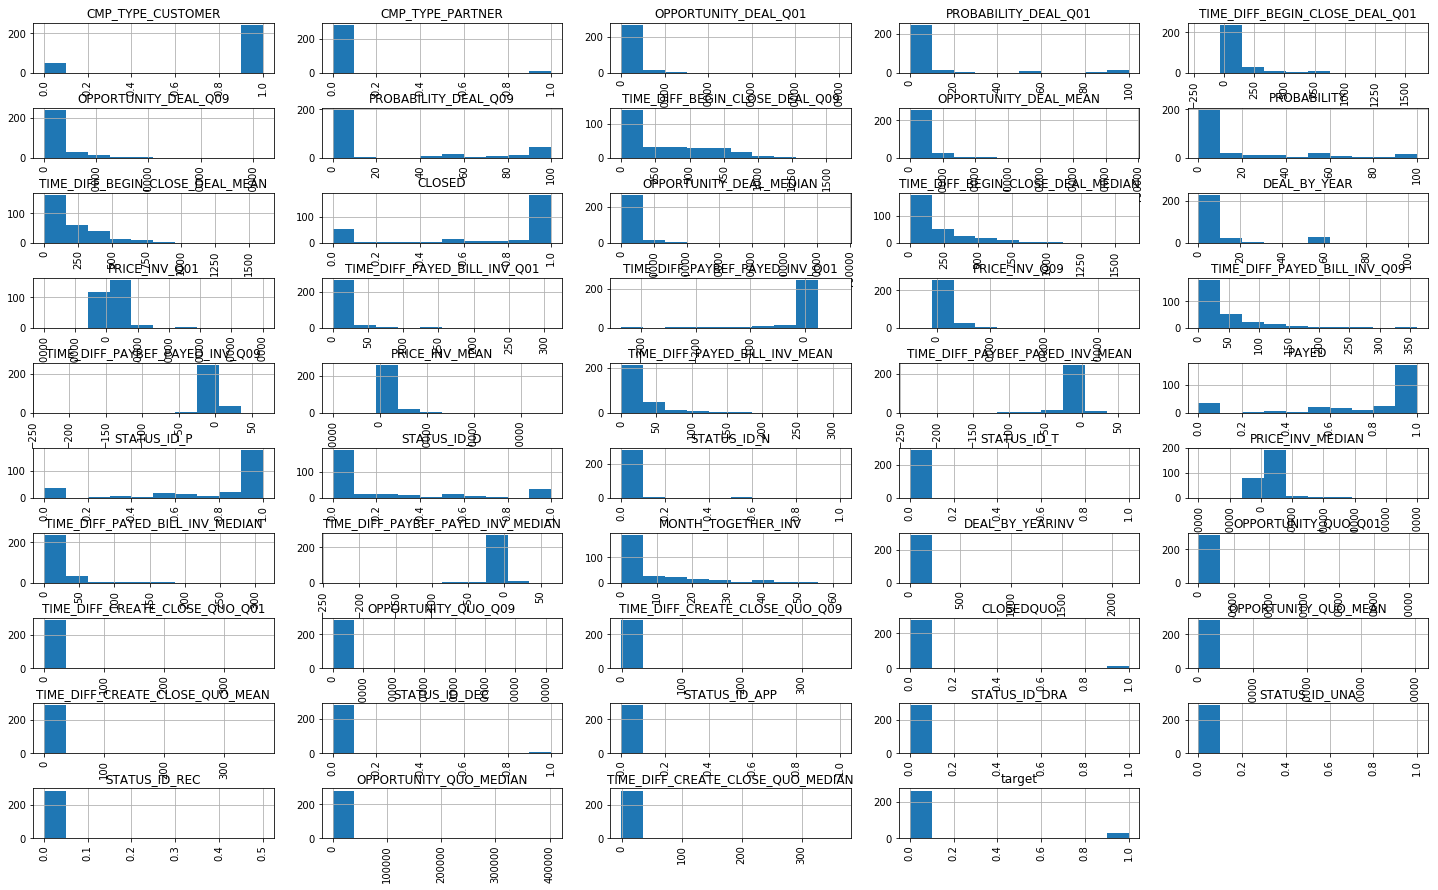

In [6]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data_train.shape[1]) / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == np.object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [7]:
X_train=data_train.drop(['target'], axis=1)
y_train = data_train['target']

X_test=data_test.drop(['target'], axis=1)
y_test = data_test['target']

In [8]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state = 17)
tree.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [9]:
tree_predictions = tree.predict(X = X_test) # Ваш код здесь

In [10]:
tree_predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [11]:
accuracy_score = tree.score(X = X_test, y = y_test)
print(accuracy_score)

0.9065743944636678


In [39]:
rf = RandomForestClassifier(criterion="entropy", random_state = 17, n_estimators=200,
                            max_depth=3, n_jobs=-1)
rf.fit(X = X_train, y = y_train) # Ваш код здесь

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [40]:
forest_predictions = rf.predict(X = X_test)
print(forest_predictions)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [38]:
accuracy_score = rf.score(X = X_test, y = y_test)
print(accuracy_score)

0.9411764705882353


In [34]:
pickle.dump(rf, open('random_forest.sav', 'wb'))

--------------------------------------------------------------------------------------------------------------------------------

In [78]:
forest_params = {'max_depth': range(4, 21),
                'max_features': range(7, 45),
                'random_state': range(1, 100)}

In [79]:
locally_best_forest = GridSearchCV(rf, forest_params, n_jobs=-1)

In [80]:
locally_best_forest.fit(X = X_train, y = y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(4, 21), 'max_features': range(7, 45), 'random_state': range(1, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [81]:
print("Best params:", locally_best_forest.best_params_)
print("Best cross validaton score", locally_best_forest.best_score_)

Best params: {'max_depth': 4, 'max_features': 7, 'random_state': 40}
Best cross validaton score 0.8650519031141869


In [82]:
tuned_forest_predictions = locally_best_forest.predict(X = X_test) # Ваш код здесь
accuracy_score = locally_best_forest.score(X = X_test, y = y_test)
print(accuracy_score)

0.9342560553633218


In [83]:
tuned_forest_predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)